# Project for Data Science: FoodHub Data Analysis



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. We will find the analysis of the Data and its interpretation.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Data Analytics/food_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

In [5]:
df.shape

print('The data frame has', df.shape[0], 'rows and', df.shape[1], 'columns' )

The data frame has 1898 rows and 9 columns


#### Observations:
The Rating column seems to be a mixed type variable, as we can see it include strings for missed ratings 'Not given'. We'll need to explore this further with .info()

The client is interested in demand for restaurants. Demand is evaluated by the number of orders.



### The datatypes of the different columns in the dataset (The info() function can be used)

In [6]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
We have 9 variables: dtypes: float64(1), int64(4), object(4)

* 4 of type integer: order_id, customer_id, food_preparation_time, delivery_time

* 4 of type object: restaurant_name, cuisine_type, rating, day_of_the_week

* and one of type float: cost_of_the_order

* We observe that each columns have the same amount of entries (1898).

Note: Rating is currently an object, it should be a float. This may be because the column includes values 'Not given' which is of type string.


In [7]:
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

### **Treating misaligned values - rating:** we'll want to do calculations on the rating variable, like getting the mean rating. And it is not interesting to us in this analysis to explore 'not given' as a categorical group, so we'll replace it to NaN.


In [8]:
# replacing values with nan
df['rating'] = df['rating'].replace(['Not given'], np.nan)

# changing data type to float
df['rating'] = df['rating'].astype(float)

# checking the change has successfuly been done
df.info()

# checking if NaN is present in the data frame
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24


Find and fix any missing values in the data. If yes, treat them using an appropriate method

In [9]:
# making a copy of the data frame before treating missing values

df_original= df.copy()

In [10]:
# Checking for missing values in the data
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,736
food_preparation_time,0
delivery_time,0


In [11]:
# Checking the percentage of missing values
df.isnull().sum()[df.isnull().sum()>0]/df.shape[0]*100

,0
rating,38.777661


**Observations:**
* There are missing values in 1 columns of the data: 736 missing values for 'rating' column.
* 38% of our rating data is missing. We could consider whether imputation methods could be useful for handling these missing values.
* We will treat these missing values after understanding the distributions of features in the data, the relationships that exist in the data. This will help us impute these values more effectively.


#### **Exploring missing values for 'rating'**

In [12]:
# checking if there is a pattern of missing values accross days of the week

df.loc[df['rating'].isnull() == True, 'day_of_the_week'].value_counts()/df['day_of_the_week'].value_counts()*100

,count
day_of_the_week,
Weekend,39.156181
Weekday,37.842779


In [13]:
# checking if there is a pattern of missing values accross cuisine types

df.loc[df['rating'].isnull() == True, 'cuisine_type'].value_counts()/df['cuisine_type'].value_counts()*100

,count
cuisine_type,
American,36.986301
Chinese,38.139535
French,44.444444
Indian,31.506849
Italian,42.281879
Japanese,41.914894
Korean,30.769231
Mediterranean,30.434783
Mexican,37.662338


In [14]:
# creating a new variable that captures the patterns of missingness

df_original['rating_missing'] = df_original['rating'].isnull().astype(int)

<Axes: xlabel='rating_missing', ylabel='count'>

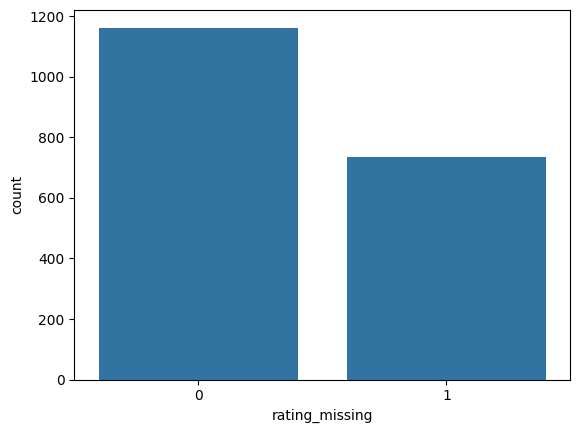

In [15]:
# We can visualize the missing counts for 'rating'
sns.countplot(df_original, x='rating_missing')

<Axes: >

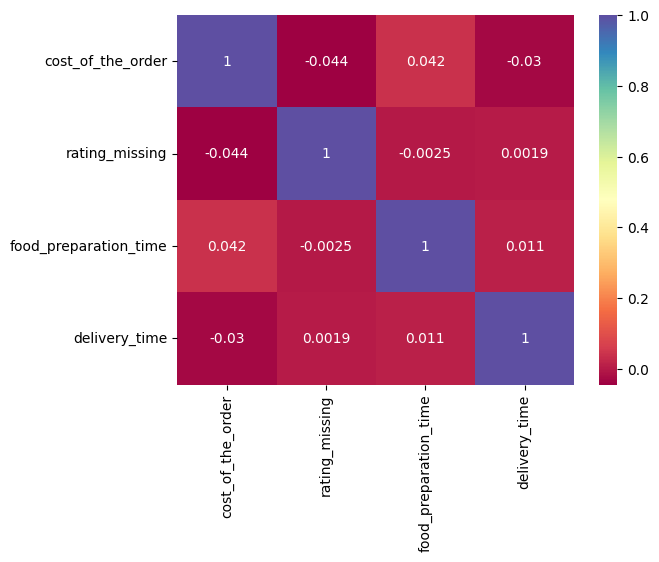

In [16]:
# Let's now visualize the correlation table for missingness of 'rating'
sns.heatmap(data=df_original[['cost_of_the_order','rating_missing','food_preparation_time','delivery_time']].corr(), annot=True, cmap='Spectral')

**Observations**
* It appears that the proportion of missing values is fairly consistent regardless of the day of the week or cuisine type. This suggests that the missingness is not heavily biased toward a specific day or cuisine.
* Note there is a higher percentage of missing values for 'French', 'Thai' and 'Spanish' cuisines, however this is consistent with the fewer number of orders for these types of cuisine. The fact the correlation table for missingness of rating shows little correlation between cuisine type and rating also confirms the variance is not explained by cuisine types. This could still be explained by some other factor.
* Misssingness of ratings have little to no correlation with other variables (see heatmap), indicating this may be random.

#### **Treating missing values for 'rating'**
* One approach to treat the missing ratings would be to group the data on the basis of restaurants in a cuisine type to get a better idea of the average ratings.
* Then we could impute the missing values of each restaurant by their existing average rating (mean). Note that some restaurants have no ratings, these would have to be treated separately.
* For restaurants without rating, we could impute the missing ratings by the average rating of their respective cuisine type.

**Assumptions and limitations**

* We're assuming the missingness is missing completely at random (MCAR). And there are several reasons reinforcing this assumption:

1. The proportion of missingness is fairly consistent accross day of the week and cuisine types.
1.   There is little variance in missingness explained by food prep, delivery time and cost of order.



In [17]:
# checking the average rating by restaurant name and cuisine type
df.groupby(['cuisine_type', 'restaurant_name'])['rating'].mean()

cuisine_type  restaurant_name           
American      'wichcraft                    5.000000
              5 Napkin Burger               4.000000
              67 Burger                     5.000000
              Alidoro                            NaN
              Bareburger                    4.058824
                                              ...   
Thai          Song Thai Restaurant & Bar    5.000000
              Spice Thai                         NaN
Vietnamese    Nha Trang One                 3.000000
              V-Nam Cafe                    4.000000
              Xe May Sandwich Shop          5.000000
Name: rating, Length: 179, dtype: float64

In [18]:
# checking the average rating by cuisine type
df.groupby(['cuisine_type'])['rating'].mean()

,rating
cuisine_type,
American,4.298913
Chinese,4.338346
French,4.300000
Indian,4.540000
Italian,4.360465
Japanese,4.373626
Korean,4.111111
Mediterranean,4.218750
Mexican,4.416667


In [19]:
# filling missing values for restaurants having been already rated at least once
df.groupby(['restaurant_name'])['rating'].transform('mean') #initiate the lookup table

#imputing missing values in rating
df['rating'] = df['rating'].fillna(value= df.groupby(['cuisine_type', 'restaurant_name'])['rating'].transform('mean'))

In [20]:
# Checking the remaining missing values, that should be the ones corresponding to restaurants without rating yet
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,30
food_preparation_time,0
delivery_time,0


In [21]:
# filling the remaining missing values with the rating mean of their corresponding cuisine type
df.groupby(['cuisine_type'])['rating'].transform('mean') #initiate the lookup table

#imputing missing values in rating
df['rating'] = df['rating'].fillna(value= df.groupby(['cuisine_type'])['rating'].transform('mean'))

In [22]:
# Checking if we imputed all missing values succesfully
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


In [23]:
# checking for duplicates in the data.
df.duplicated().sum()

np.int64(0)

The statistical summary of the data. The minimum, average, and maximum time it takes for food to be prepared once an order is placed.

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1.477496e+06,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,1.286000e+05,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,1.414000e+01,2.229750e+01,35.41
rating,1898.0,4.349919e+00,0.606307,3.00,4.00,4.328125e+00,5.000000e+00,5.00
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,2.700000e+01,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,2.500000e+01,2.800000e+01,33.00


#### Observations:

* `cost_of_the_order:` On average the order costs 14 dollars . Also, 75% of the orders cost less than or equal to 22 dollars. The minimum cost is 4.5 dollars and the maximum cost is 35 $, indicating the range of order cost is big. There is a notable difference between the maximum value and the 75% percentile of the data which indicates there might be outliers present in this column. The data seems to be quite sparse, indicated by a notable standard deviation of 7.5 with a mean and median of 16.4 and 14.1 respectively.
* `rating`: The average rating of orders is 4.3 . There are no orders under 3/5.
* The distribution of the `food_preparation_time` and `delivery_time` is fine. There doesn't seem to be extreme values, their standard deviation are fine, around 4.6 and 5 minutes respectively, which indicates there is no big variation in food preparation and delivery time accross orders.

#### Distribution, Skewness and Bias Observations:





In [25]:
# Making a list of all categorical variables
cat_cols =  ['restaurant_name', 'day_of_the_week', 'cuisine_type']

# Printing the count of unique categorical levels in each column
for column in cat_cols:
    print(df[column].value_counts())
    print("-" * 50)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Rye House                      1
Hiroko's Place                 1
Frank Restaurant               1
Sarabeth's West                1
'wichcraft                     1
Name: count, Length: 178, dtype: int64
--------------------------------------------------
day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64
--------------------------------------------------
cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64
--------------------------------------------------


In [26]:
# Printing the percentage of unique categorical levels in each column
for column in cat_cols:
    print(df[column].value_counts(normalize=True))
    print("-" * 50)

restaurant_name
Shake Shack                  0.115385
The Meatball Shop            0.069547
Blue Ribbon Sushi            0.062698
Blue Ribbon Fried Chicken    0.050580
Parm                         0.035827
                               ...   
Rye House                    0.000527
Hiroko's Place               0.000527
Frank Restaurant             0.000527
Sarabeth's West              0.000527
'wichcraft                   0.000527
Name: proportion, Length: 178, dtype: float64
--------------------------------------------------
day_of_the_week
Weekend    0.711802
Weekday    0.288198
Name: proportion, dtype: float64
--------------------------------------------------
cuisine_type
American          0.307692
Japanese          0.247629
Italian           0.157007
Chinese           0.113277
Mexican           0.040569
Indian            0.038462
Middle Eastern    0.025817
Mediterranean     0.024236
Thai              0.010011
French            0.009484
Southern          0.008957
Korean            0

In [27]:
df.groupby(['cuisine_type'] ) ['restaurant_name'].value_counts()

cuisine_type  restaurant_name            
American      Shake Shack                    219
              Blue Ribbon Fried Chicken       96
              Five Guys Burgers and Fries     29
              Bareburger                      27
              The Meatball Shop               20
                                            ... 
Thai          Rohm Thai                        1
              Spice Thai                       1
Vietnamese    V-Nam Cafe                       4
              Xe May Sandwich Shop             2
              Nha Trang One                    1
Name: count, Length: 179, dtype: int64

#### Observations:

* Highest number of orders (219) are made with Shake Shack folllowed the Meat Ball Shop (132)
* Orders seem to soar in the weekends, getting almost 3 times the orders compared to the weekday.
* 30 % of all orders come from 5 restaurants out of 178 restaurants: shake shack, the meatball shop, blue ribbon sushi, blue ribbon fried chicken, and Parm.
* 80% of all orders come from American Japanese Italian and Chinese  restaurants, which are 4 our of 14 cuisine types. Leaving all other 10 cuisine types with the rest 20%.


Orders are not rated we will list and visualize them.




In [28]:
# Counting how many orders are not rated (original dataset)
print(df_original['rating'].isnull().sum(), 'orders are not rated in the data')

736 orders are not rated in the data


#### Observations:
* 736 Orders are not rated out of 1898 entries. Which means a little less than half of orders are note rated.  

### *Exploratory Data Analysis (EDA)*

### **Univariate Analysis**

Exploring all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

**Methodology**
* We'll analyse the numerical continuous variables with histograms, boxplots: cost, food_prepration_time, delivery_time
* We'll analyse categorical variables with count plots: restaurant_name,  cuisine_type, rating, day_of_the_week,

#### **Restaurant name**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


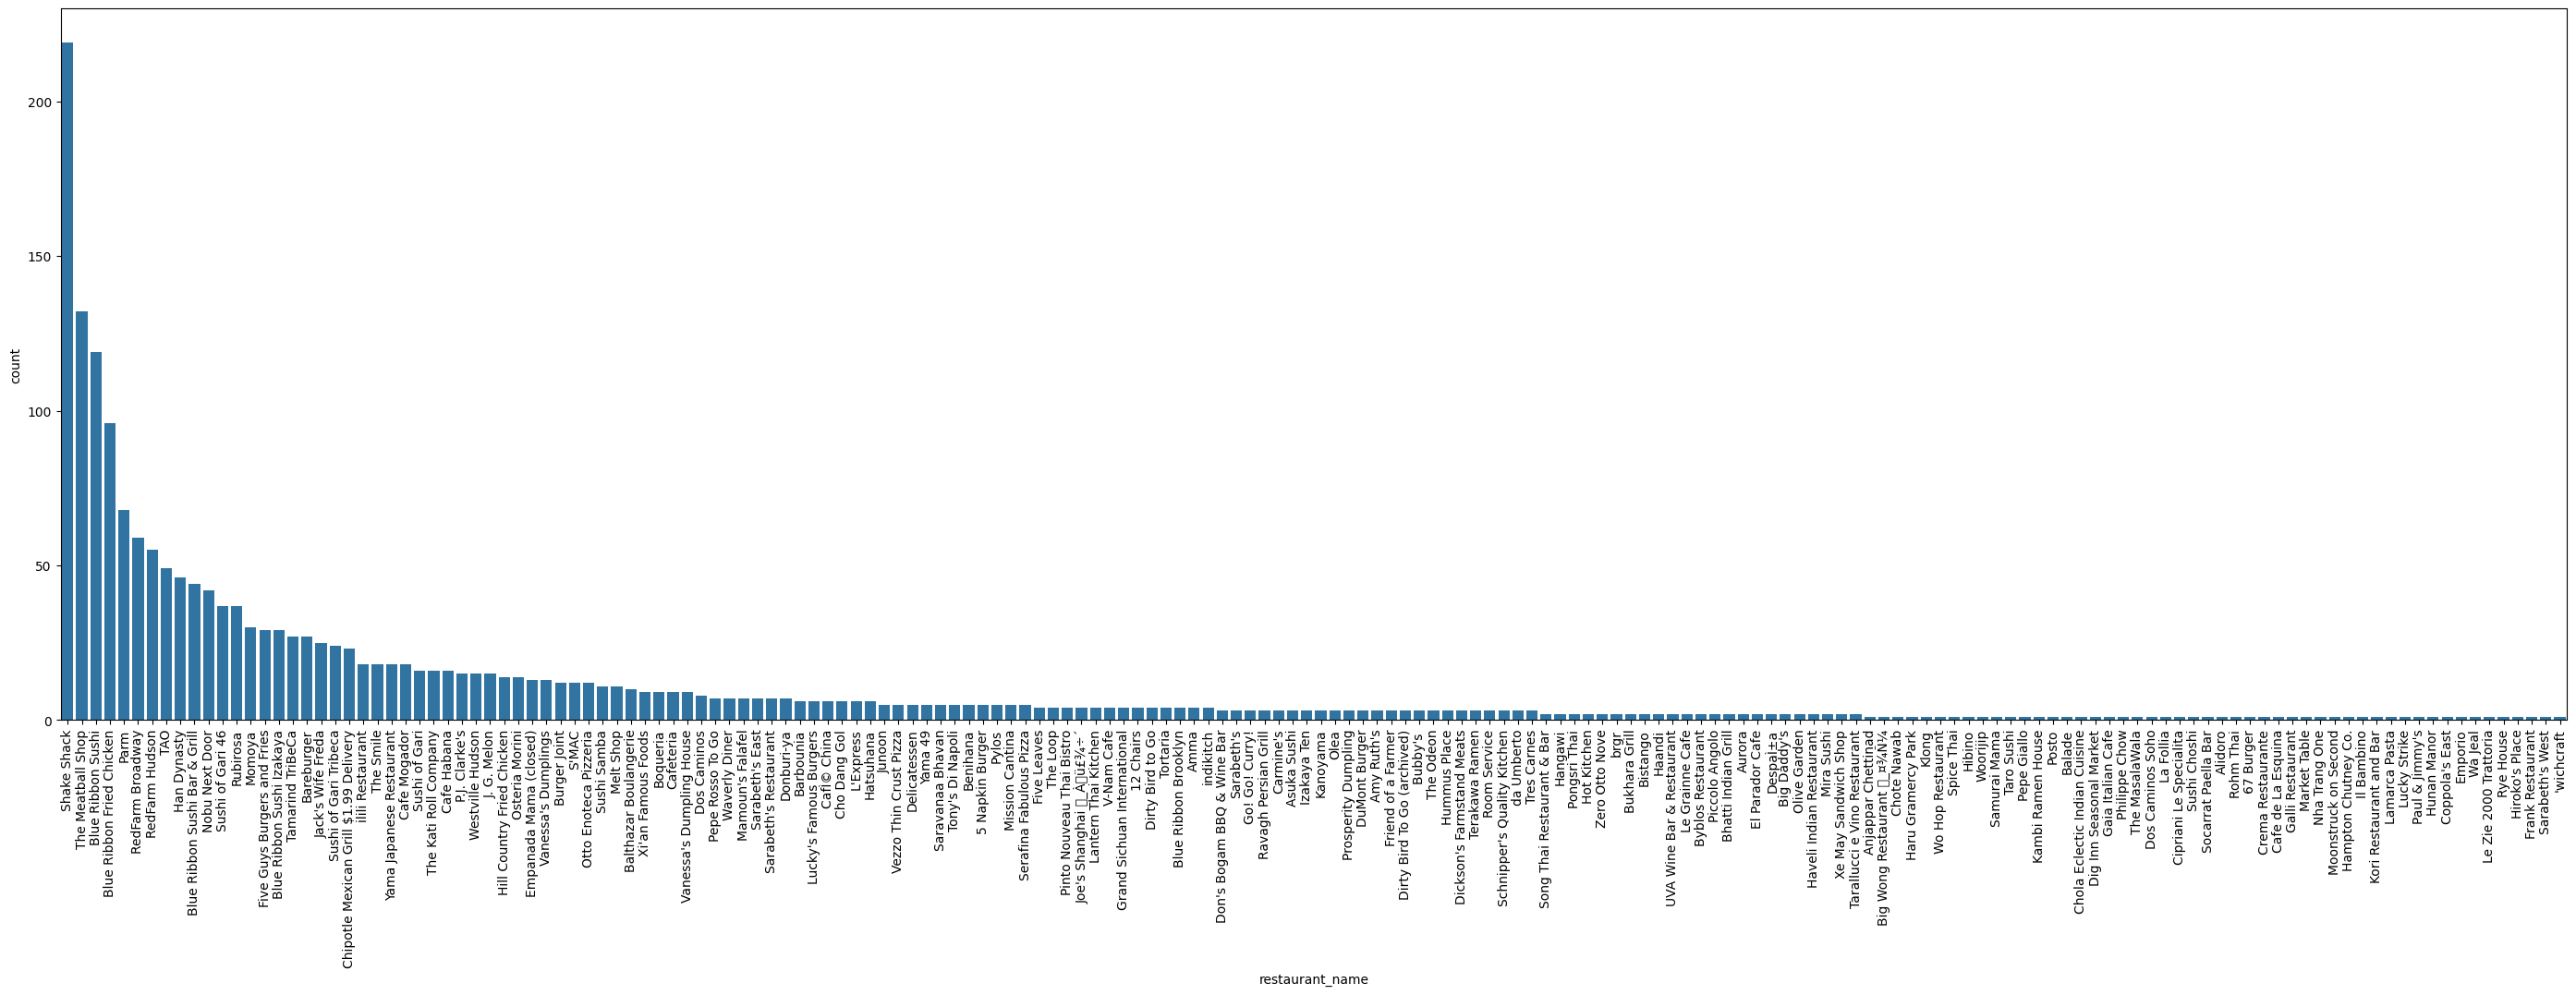

In [29]:
# Observations on restaurants
plt.figure(figsize=(35, 10))
orderrest = df['restaurant_name'].value_counts().index
sns.countplot(data=df,x='restaurant_name', order=orderrest)
plt.xticks(rotation=90)
plt.show()

#### **Cuisine type**

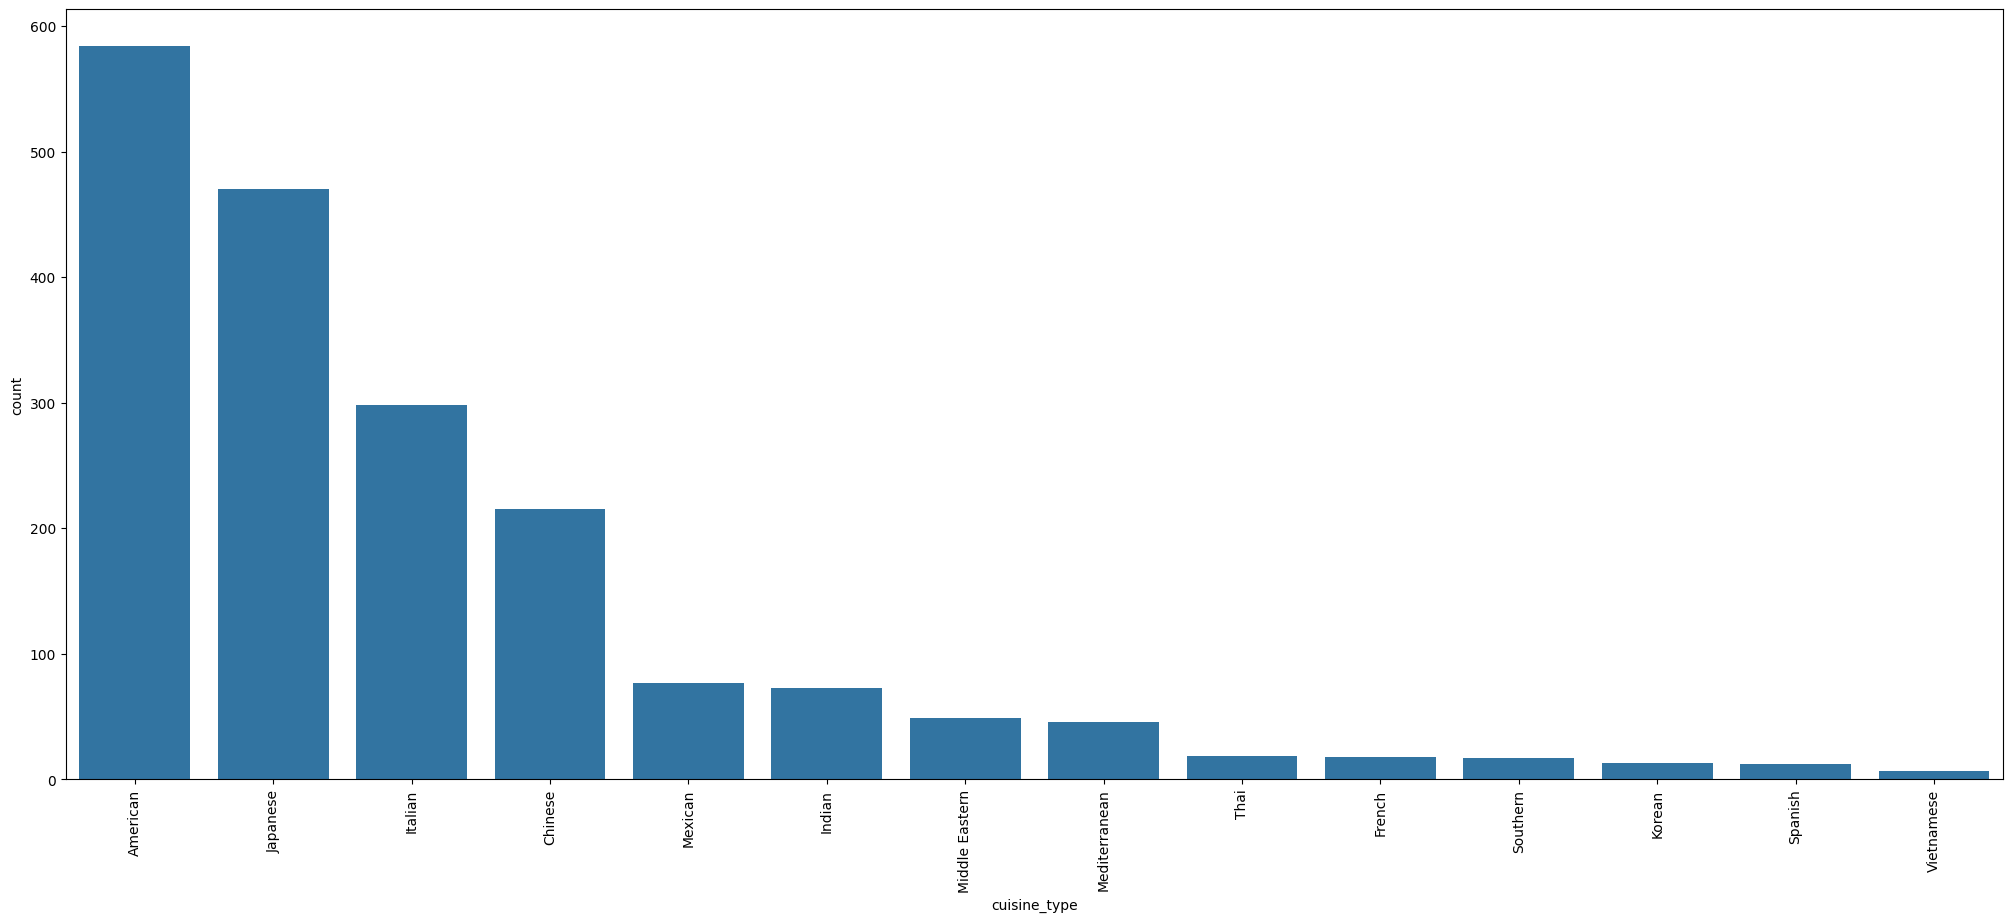

In [30]:
# Observations on types of cuisine
plt.figure(figsize=(25, 10))
order = df['cuisine_type'].value_counts().index
sns.countplot(data=df,x='cuisine_type', order=order)
plt.xticks(rotation=90)
plt.show()

In [31]:
df['cuisine_type'].value_counts()

,count
cuisine_type,
American,584
Japanese,470
Italian,298
Chinese,215
Mexican,77
Indian,73
Middle Eastern,49
Mediterranean,46
Thai,19


#### **Day of the week**

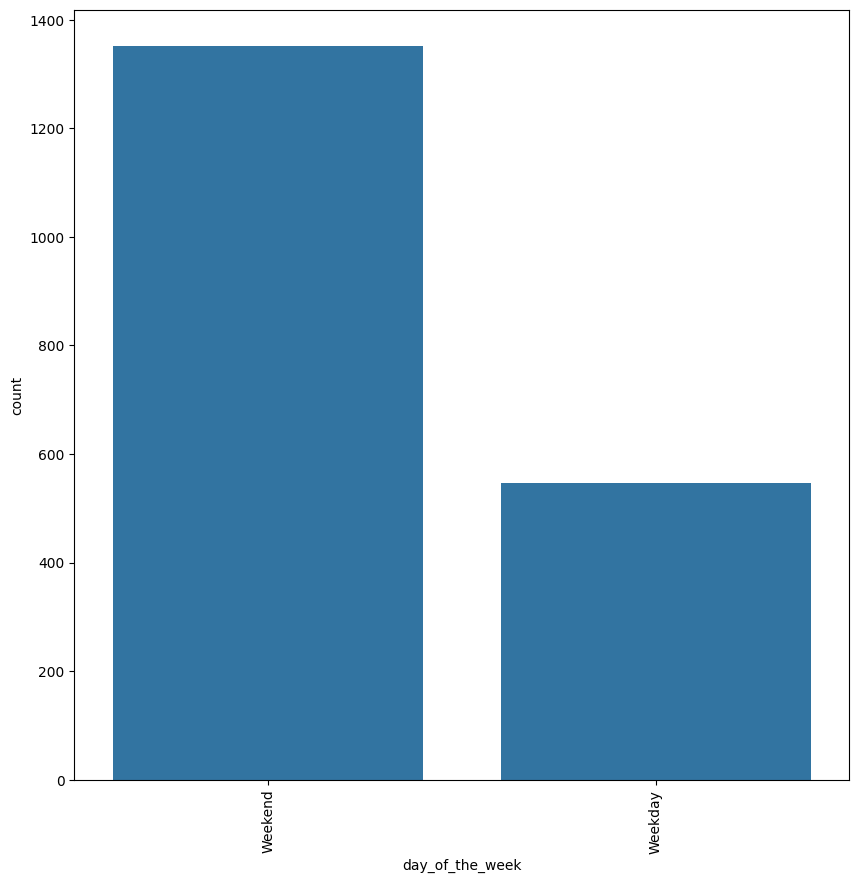

In [32]:
# Observations on weekday vs weekends
plt.figure(figsize=(10, 10))
sns.countplot(data=df,x='day_of_the_week')
plt.xticks(rotation=90)
plt.show()

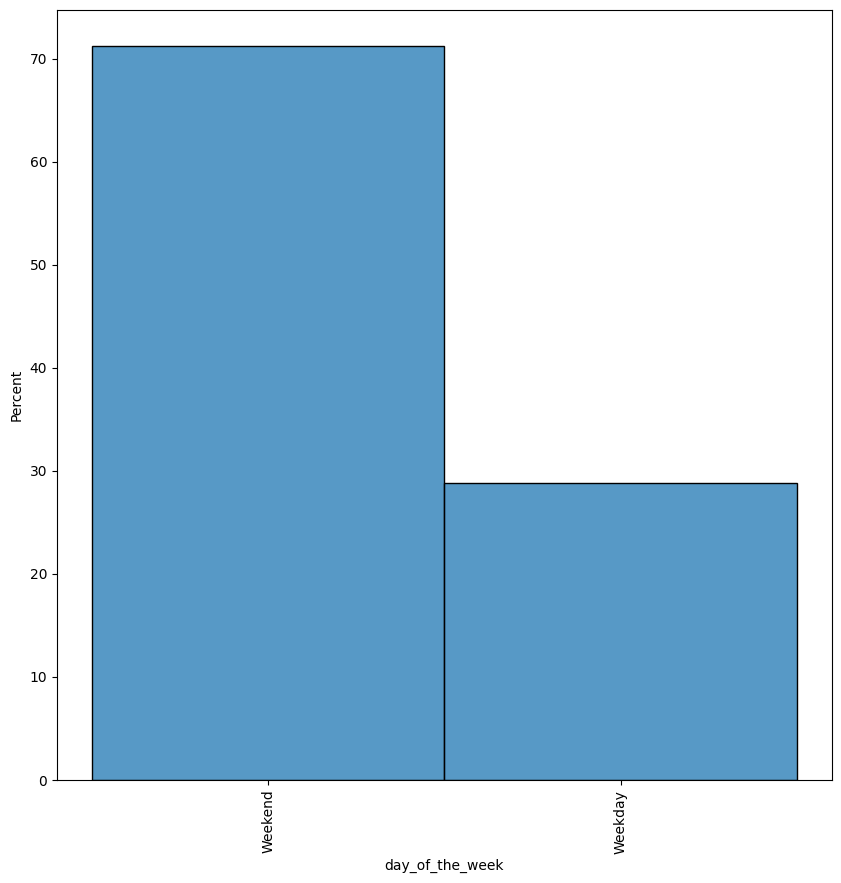

In [33]:
# Let's check the proportion of orders on weekday vs weekends
plt.figure(figsize=(10, 10))
sns.histplot(data=df, x='day_of_the_week', stat= 'percent')
plt.xticks(rotation=90)
plt.show()

#### **Rating**

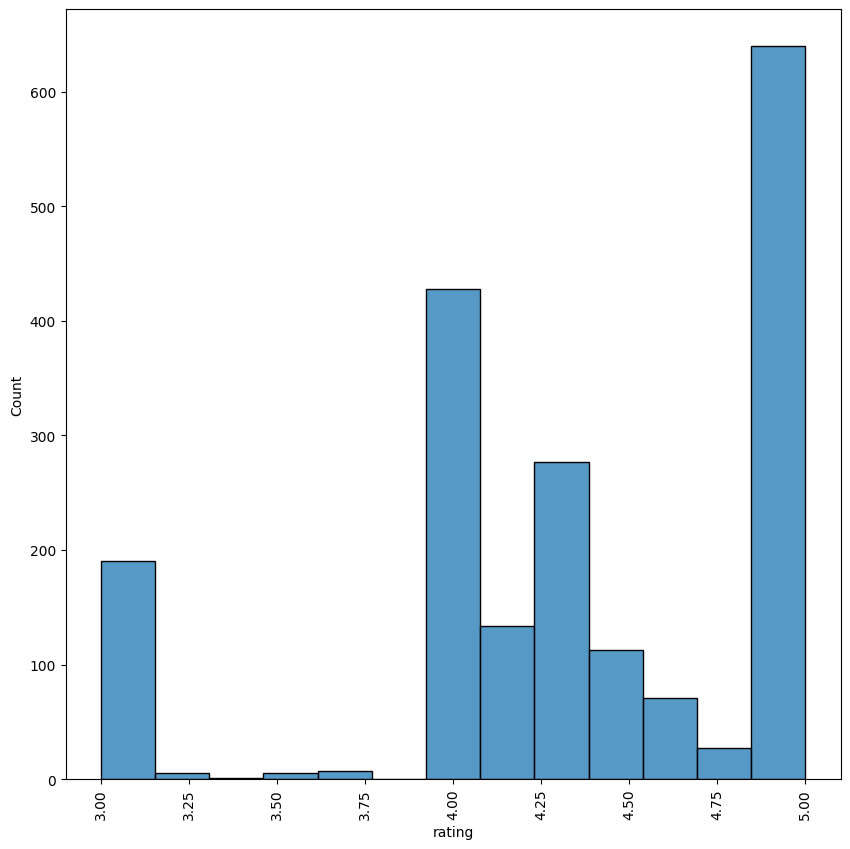

In [34]:
# Observations on rating
plt.figure(figsize=(10, 10))
#orderrating = df['rating'].value_counts().index
#sns.countplot(data=df,x='rating', order=orderrating)
sns.histplot(data=df,x='rating')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='rating', ylabel='Count'>

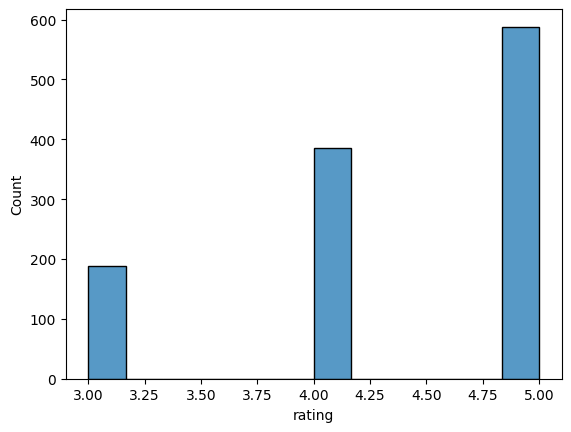

In [35]:
# Let's plot the rating counts for the original data set to have a better understanding
sns.histplot(data=df_original,x='rating')

#### **Food Prepration Time**

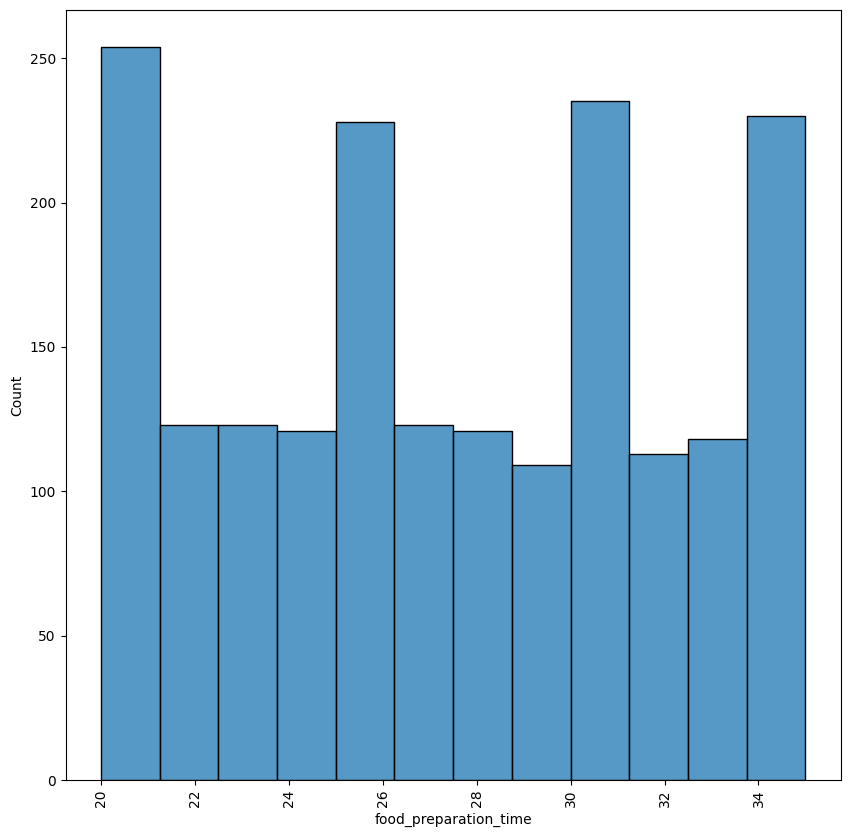

In [36]:
# Observations on food prep time
plt.figure(figsize=(10, 10))
sns.histplot(data=df,x='food_preparation_time')
plt.xticks(rotation=90)
plt.show()

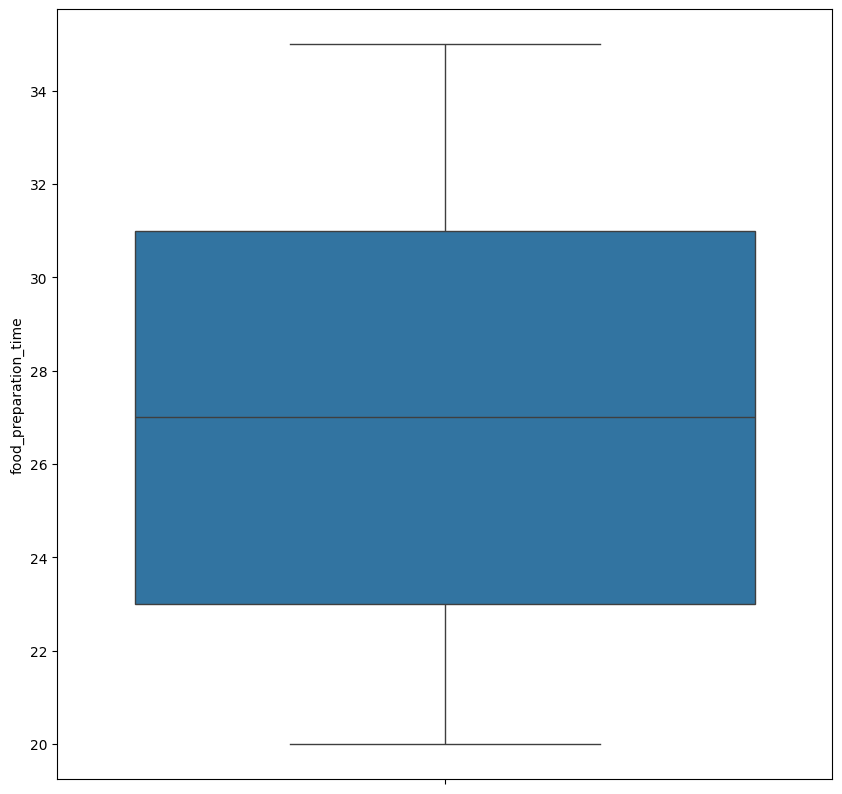

In [37]:
# summary for food prep time
plt.figure(figsize=(10, 10))
sns.boxplot(data=df,y='food_preparation_time')
plt.xticks(rotation=90)
plt.show()

#### **Delivery Time**

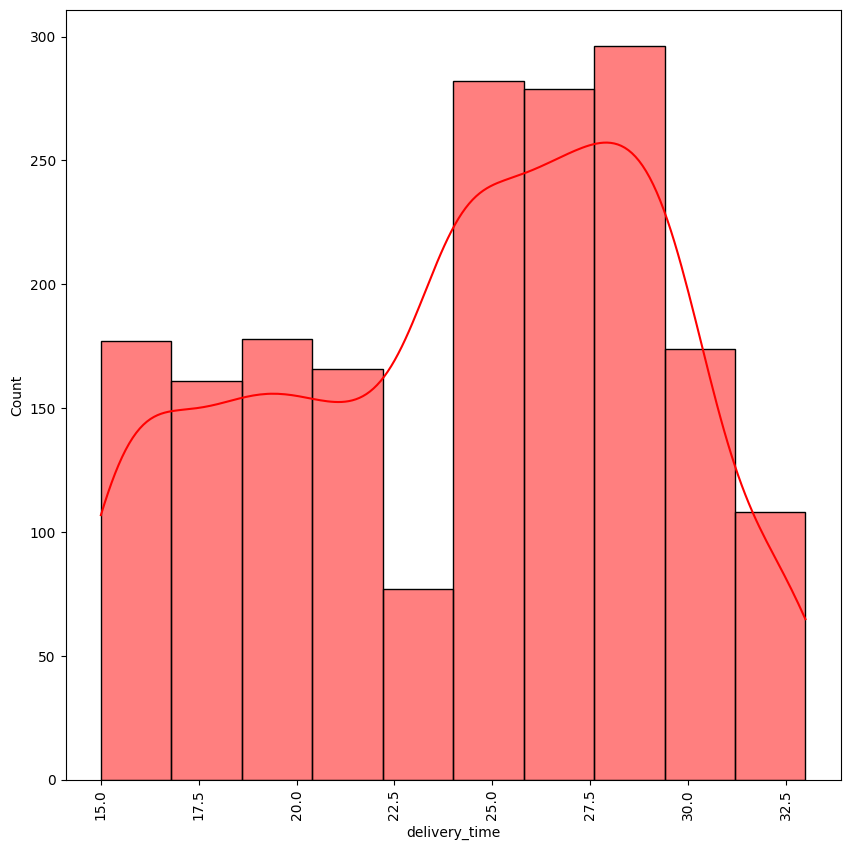

In [38]:
# Observations on delivery time
plt.figure(figsize=(10, 10))
sns.histplot(data=df,x='delivery_time', kde= True, color= 'red', bins=10)
plt.xticks(rotation=90)
plt.show()

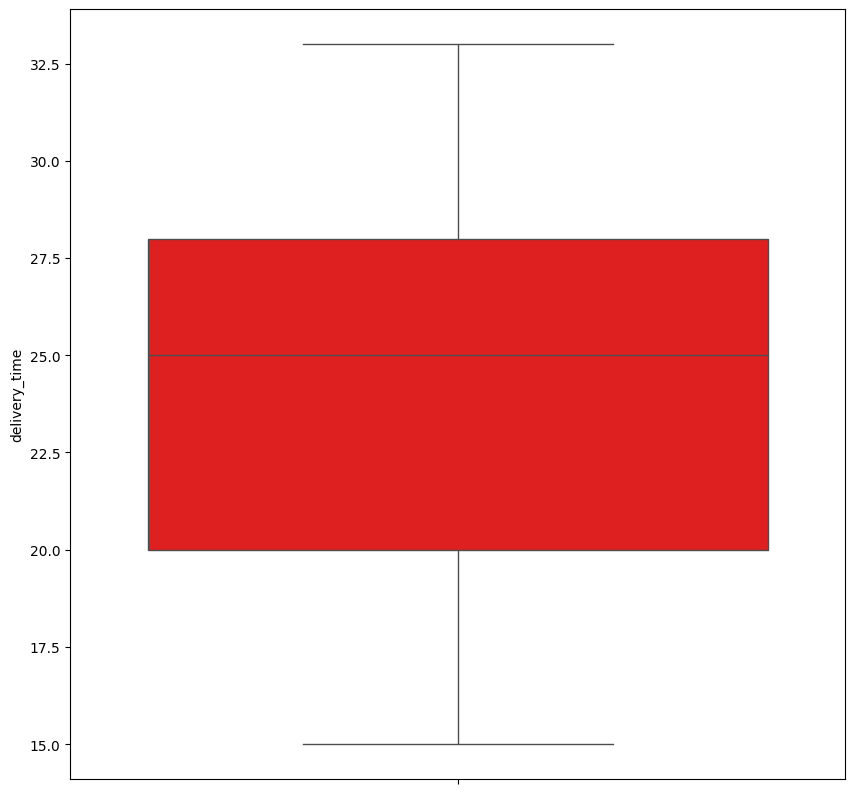

In [39]:
# summary for delivery time
plt.figure(figsize=(10, 10))
sns.boxplot(data=df,y='delivery_time' , color= 'red')
plt.xticks(rotation=90)
plt.show()

In [40]:
# Let's build a new variable that aggregates food prep and delivery time

df['total_del_time'] = df['food_preparation_time'] + df['delivery_time']

# Let's make sure the new column has been added correctly

df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_del_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,4.100000,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,4.333333,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.000000,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.000000,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.000000,25,24,49
...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5.000000,31,17,48
1894,1477421,397537,The Smile,American,12.18,Weekend,5.000000,31,19,50
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,4.219178,31,24,55
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5.000000,23,31,54


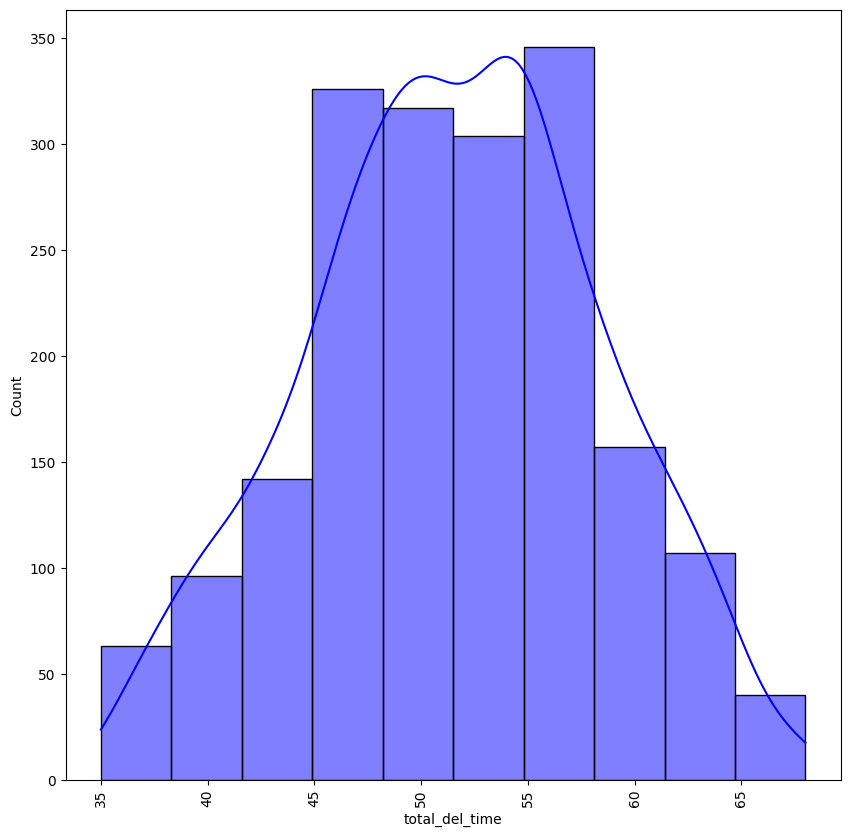

In [41]:
# Observations on delivery time
plt.figure(figsize=(10, 10))
sns.histplot(data=df,x='total_del_time', kde= True, color= 'blue', bins=10)
plt.xticks(rotation=90)
plt.show()

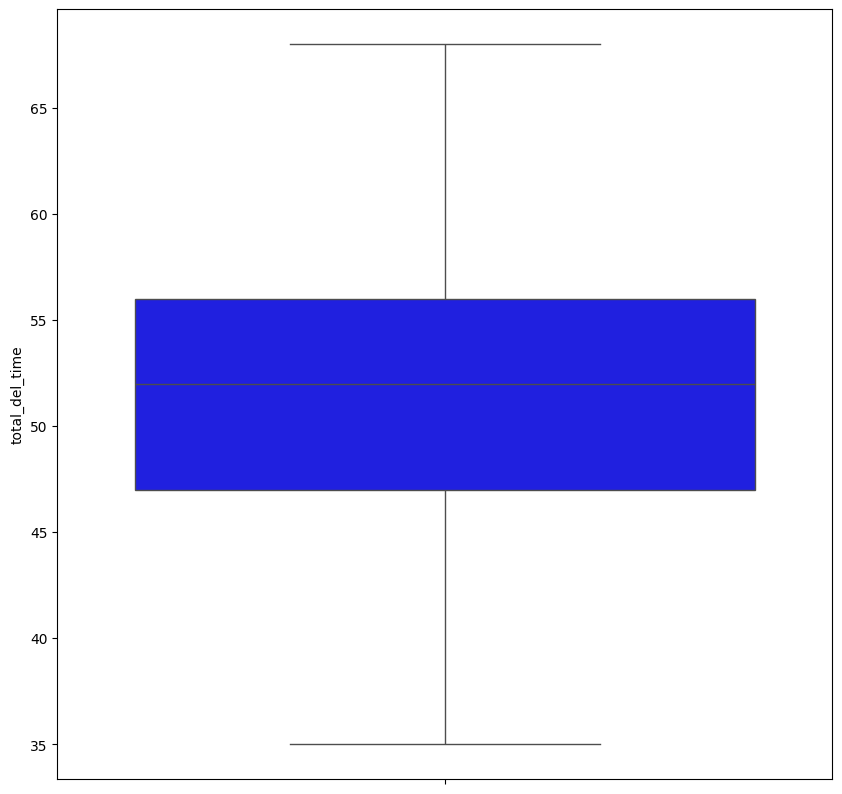

In [42]:
# summary for delivery time
plt.figure(figsize=(10, 10))
sns.boxplot(data=df,y='total_del_time' , color= 'blue')
plt.xticks(rotation=90)
plt.show()

#### **Cost**

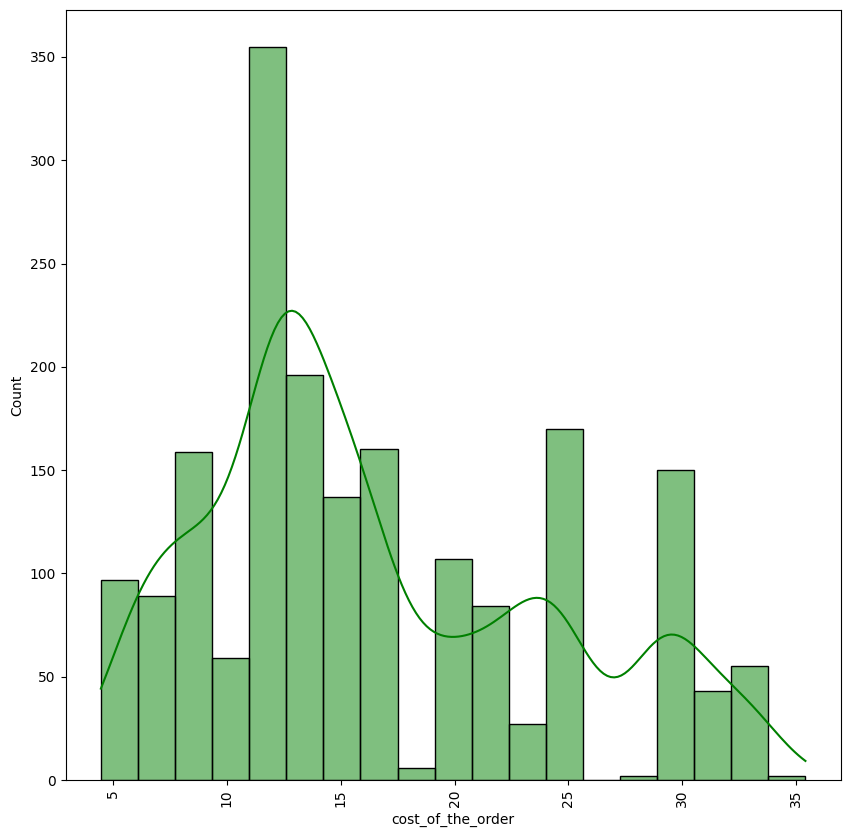

In [43]:
# Observations on cost of order
plt.figure(figsize=(10, 10))
sns.histplot(data=df,x='cost_of_the_order', kde= True, color= 'green')
plt.xticks(rotation=90)
plt.show()

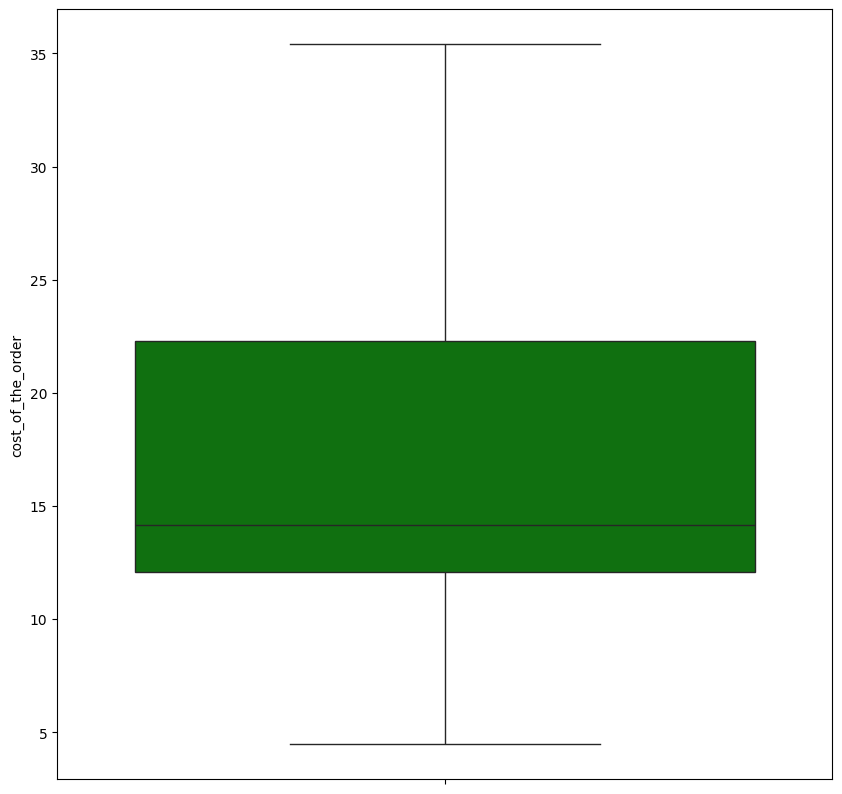

In [44]:
# Observations on cost of order
plt.figure(figsize=(10, 10))
sns.boxplot(data=df,y='cost_of_the_order', color= 'green')
plt.xticks(rotation=90)
plt.show()

#### **Observations**
* The highest number of orders are made for Shake Shak, followed by the Meatball Shop
* American, Japanese and Italian have the highest amount of orders, whereas korean, spanish and vietnamese have the lowest amount of orders.
* The difference between the number of orders of vietnamese (7) and American cuisines (584) is substantial.
* About 70% of orders are made on the weekends.


#### Relationship between numerical and Categorical Variables


🧪 Hypothesis

H₀ (Null Hypothesis): There's no significant difference in customer ratings between weekend and weekday orders.

H₁ (Alternative Hypothesis): There's a significant difference in customer ratings between weekend and weekday orders.

We'll use an independent two-sample t-test.

📌 Step 1: Prepare Data for Hypothesis Testing

In [45]:
# Create two groups based on day_of_the_week
weekday_ratings = df[df['day_of_the_week'] == 'Weekday']['rating']
weekend_ratings = df[df['day_of_the_week'] == 'Weekend']['rating']

# Print basic info
print(f"Weekday Ratings Count: {weekday_ratings.count()}")
print(f"Weekend Ratings Count: {weekend_ratings.count()}")


Weekday Ratings Count: 547
Weekend Ratings Count: 1351


📌 Step 2: Visualize Ratings Distribution

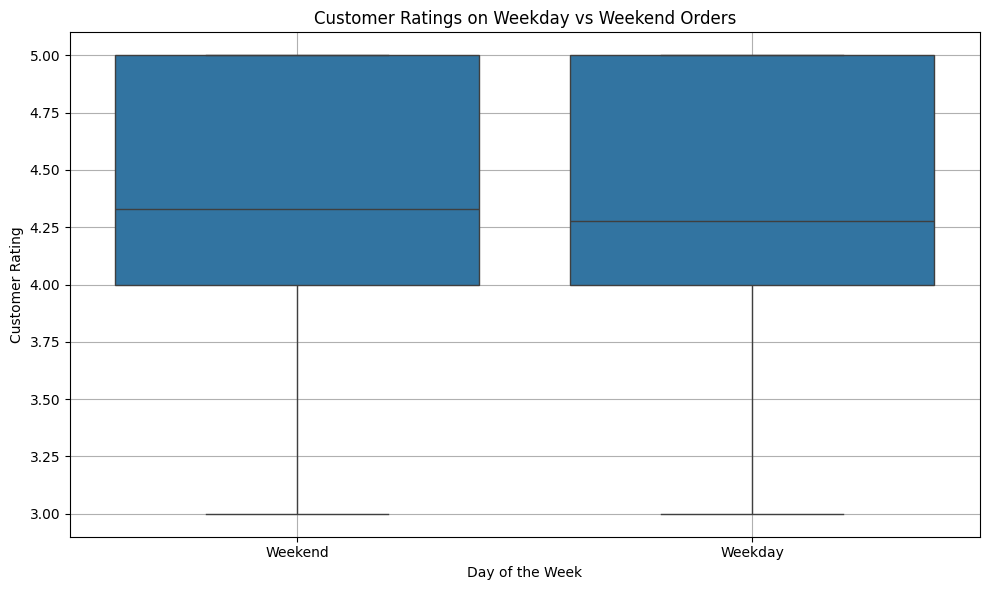

In [46]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_the_week', y='rating', data=df)
plt.title('Customer Ratings on Weekday vs Weekend Orders')
plt.xlabel('Day of the Week')
plt.ylabel('Customer Rating')
plt.grid(True)
plt.tight_layout()
plt.show()


📌 Step 3: Perform T-Test

In [47]:
from scipy.stats import ttest_ind

# Perform independent two-sample t-test (Welch’s t-test)
t_stat, p_val = ttest_ind(weekday_ratings, weekend_ratings, equal_var=False)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.4f}")

# Interpret the result
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: Ratings differ significantly between weekdays and weekends.")
else:
    print("Fail to reject the null hypothesis: No significant difference in ratings.")


T-statistic: -0.802
P-value: 0.4226
Fail to reject the null hypothesis: No significant difference in ratings.


📌 Conclusion:

The two-sample t-test between weekday and weekend customer ratings returned:

T-statistic = (-0.802)

P-value = (0.4226)

Based on our α = 0.05 threshold:

If P-value < 0.05 → There is a statistically significant difference in customer ratings between weekday and weekend orders.

If P-value ≥ 0.05 → There's no significant difference.

This insight helps FoodHub understand if customer expectations or experiences change by day type — influencing support, staffing, or promotional strategies.

##### Cost of orders

<ipython-input-48-4752064aee7f>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=df, x='cuisine_type', y='cost_of_the_order', ci= False)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

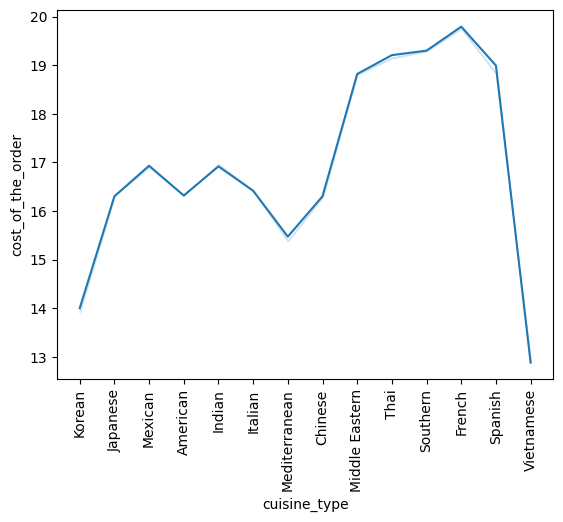

In [48]:
# it would be interesting to see the cost relative to the cuisine type, and have an idea of how many orders are in each group: strip plot
order = df.groupby(['cuisine_type'])['cost_of_the_order'].mean().index
sns.lineplot(data=df, x='cuisine_type', y='cost_of_the_order', ci= False)
plt.xticks(rotation=90)

([0, 1], [Text(0, 0, 'Weekend'), Text(1, 0, 'Weekday')])

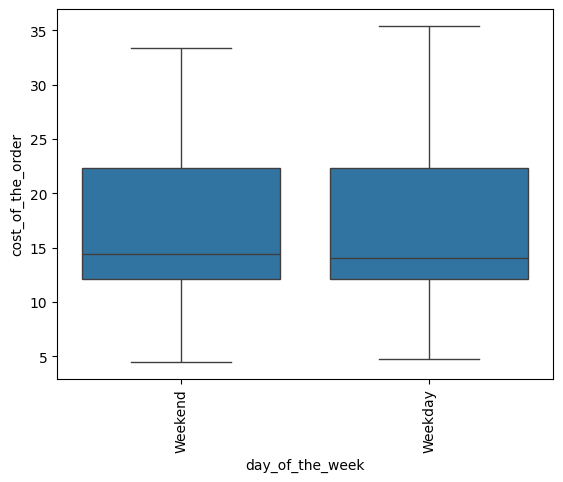

In [49]:
# it would be interesting to see the cost relative to the cuisine type, and have an idea of how many orders are in each group: strip plot

sns.boxplot(data=df, x='day_of_the_week', y='cost_of_the_order')

plt.xticks(rotation=90)

**Observations**
* The average cost seem to vary between cuisine type, with spanish and french being the restaurants with highest average cost per order.
* The cost per order doesn't vary between weekends and weekdays, this indicates customers do not seem to change consuming habits depending on the day of the week.
* The cost per order doesn't vary for restaurants having received 3 and 4 stars. Still, the median is slightly higher for restaurants that have received 5 stars. This alone is difficult to interpret, but it could indicate restaurants with 5 stars are more trusted on average and translates into more costly orders.


In [50]:
#plt.figure(figsize=(30,10))
#sns.lineplot(data=df, x='restaurant_name', y='cost_of_the_order')
#plt.xticks(rotation=90)

##### Food Preparation Time

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

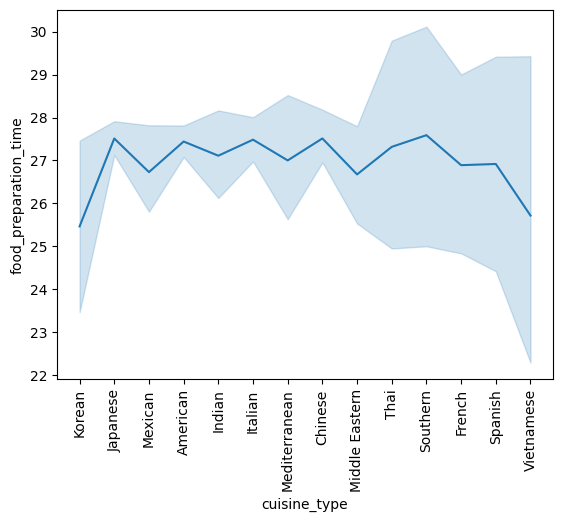

In [51]:
sns.lineplot(data=df, x='cuisine_type', y='food_preparation_time')
plt.xticks(rotation=90)

([0, 1], [Text(0, 0, 'Weekend'), Text(1, 0, 'Weekday')])

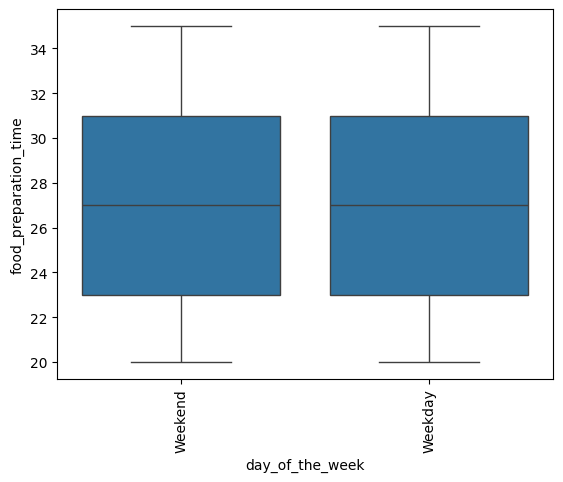

In [52]:
sns.boxplot(data=df, x='day_of_the_week', y='food_preparation_time')
plt.xticks(rotation=90)

**Observations**
* The average food preparation time doesn't vary much for different types of cuisine. On average, it stands aroud 25-28 minutes.
* The food preparation time doesn't vary between weekends and weekdays.
* The food preparation time and the total time doesn't vary between restaurants that have received different ratings.

##### Ratings

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

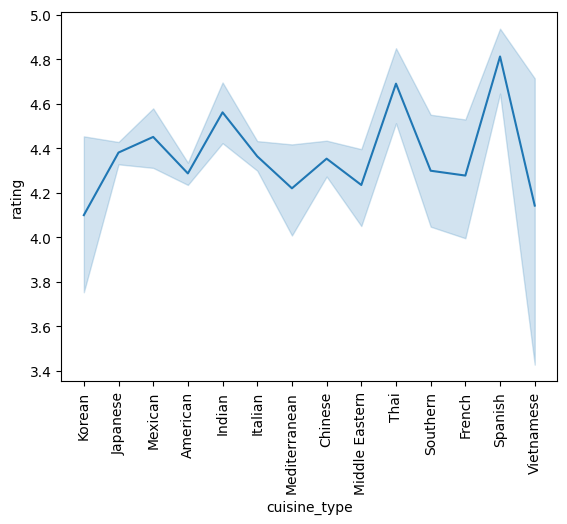

In [53]:
# we'll try to get an idea of how customers rate different cuisines
sns.lineplot(data=df, x='cuisine_type', y='rating')
plt.xticks(rotation=90)

**Obeservations**:
* Korean and Vietnamese seem to have the lowest average rating.
* While Thai and Spanish having the highest average rating.


**Observations**

* It appears that the majority of the orders fall into the 'Low' cost bin, with a significant drop in the frequency of 'Mid' and 'High' cost orders. This suggests that the service is mostly used for less expensive orders.
* There are notably more orders in the weekends than in the weekdays regardless of cost ranges.
* In the lineplot, there is about a 0.05 difference between the 'Low' and 'High' cost bins, this signifies about 1% change. Because our rating system goes from 1 to 5, and the sample size is quite large, it can still be meaningful.
* Finaly, the confidence interval is narrower for 'Low' cost orders, this could be explained by a larger amount of observation for the 'Low' cost bin, having 53% of the data. However it could also indicate more consistency in the ratings for these orders as compared to 'Mid' and 'High' cost orders.

RECOMMENDATIONS:
- Optimize delivery logistics during peak hours
- Monitor live ratings and deploy surge support
- Incentivize off-peak ordering with discounts
- Regularly analyze operational data for trends.

---